<a href="https://colab.research.google.com/github/JakeEisner/ECON3916-Statistical-Machine-Learning/blob/main/Lab%203/Lab_3_Visualizing_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
!pip install wbgapi
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['GTM', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [93]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('GTM', axis=1, level=0).copy()

Fetching data...


In [94]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

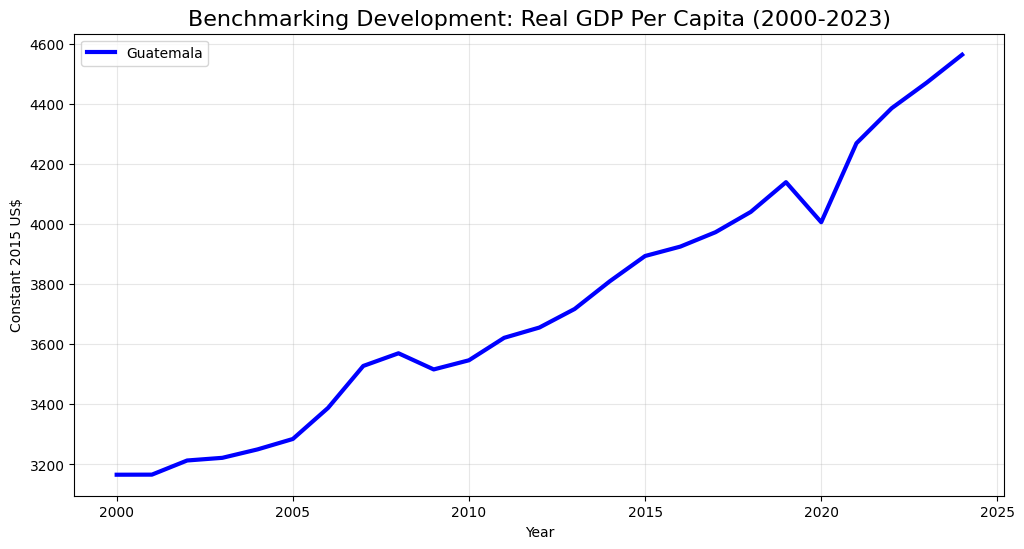

In [95]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

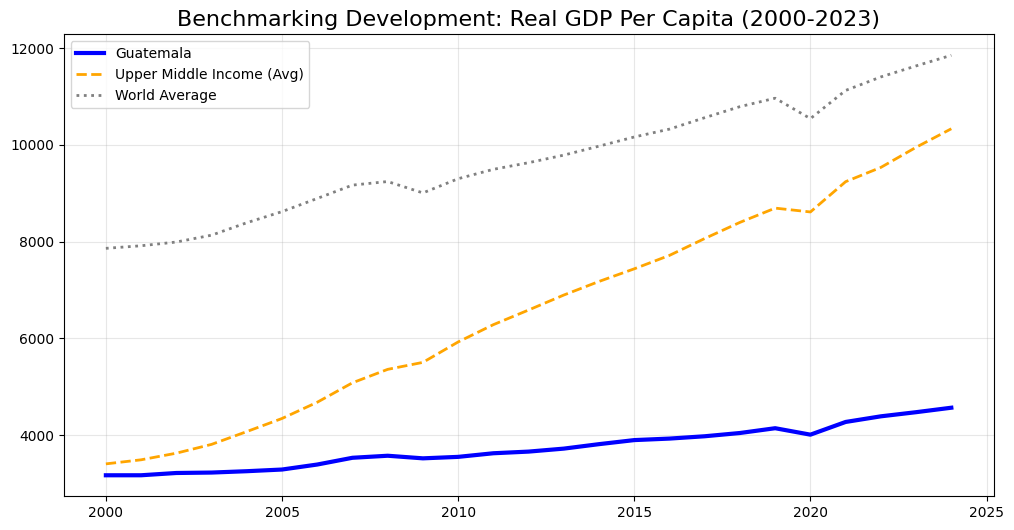

In [96]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

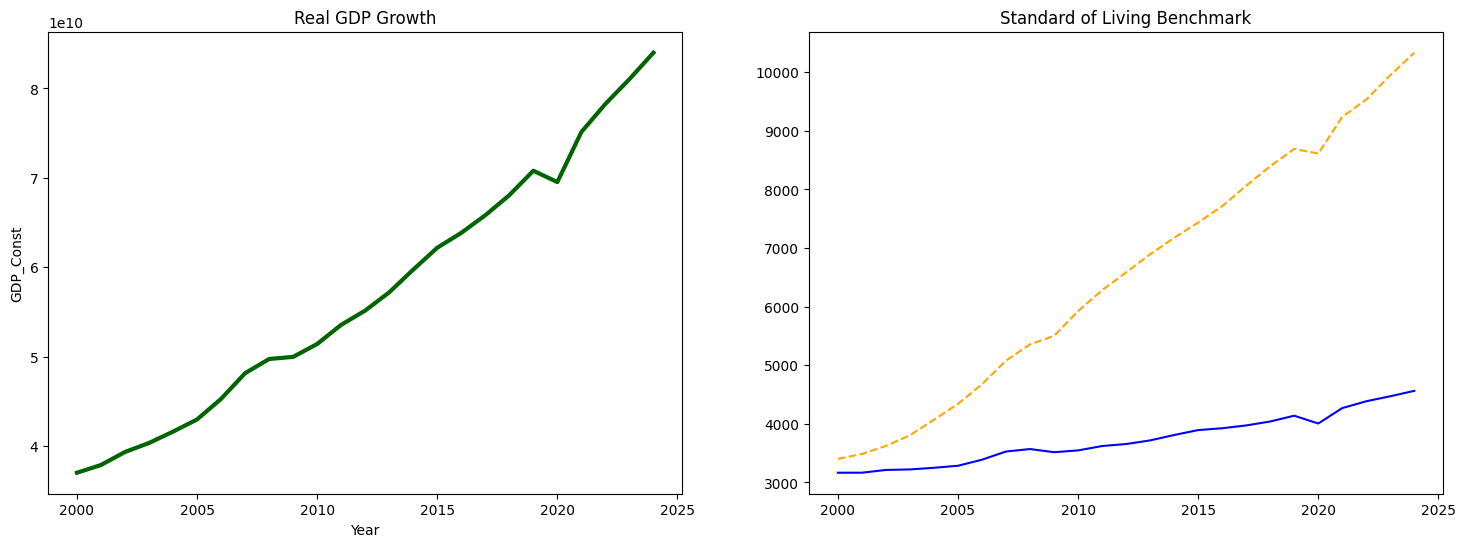

In [97]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

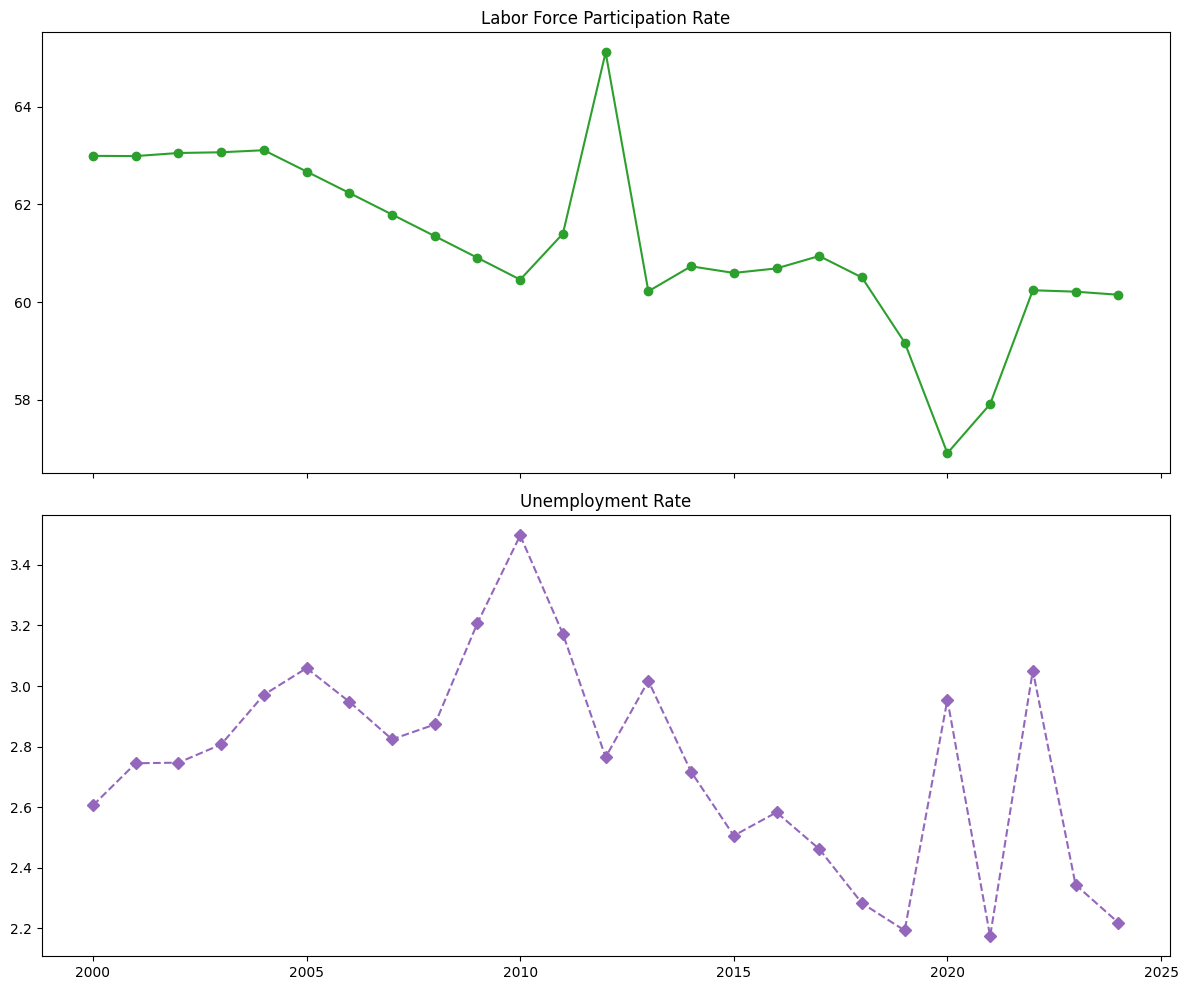

In [98]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

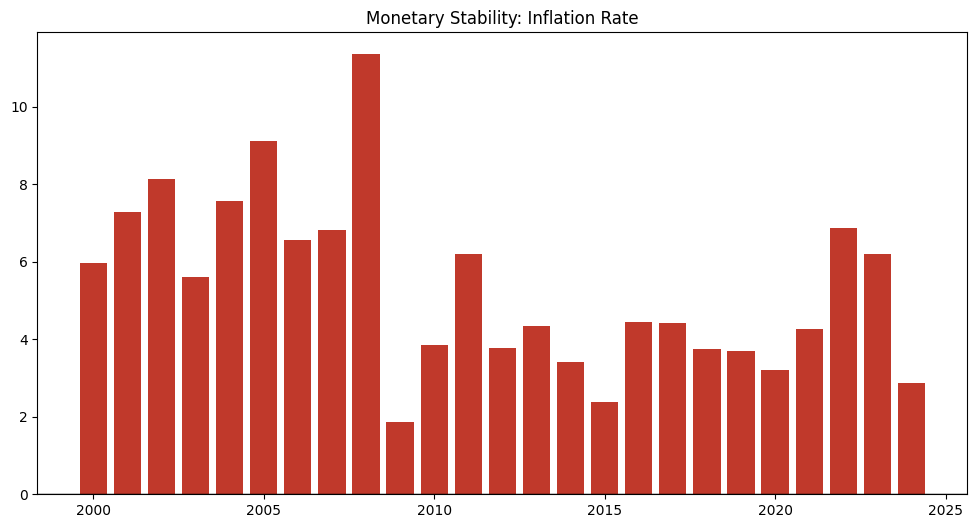

In [99]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

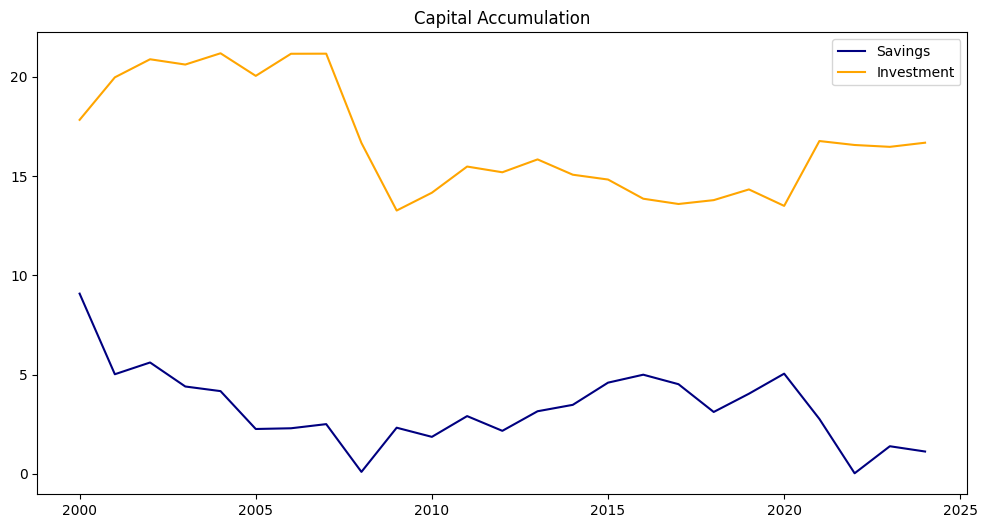

In [100]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

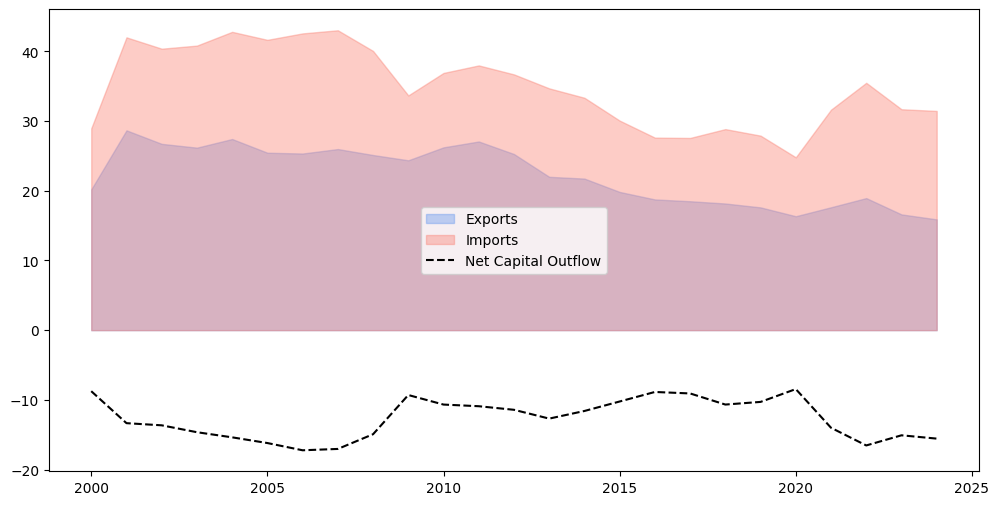

In [101]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()


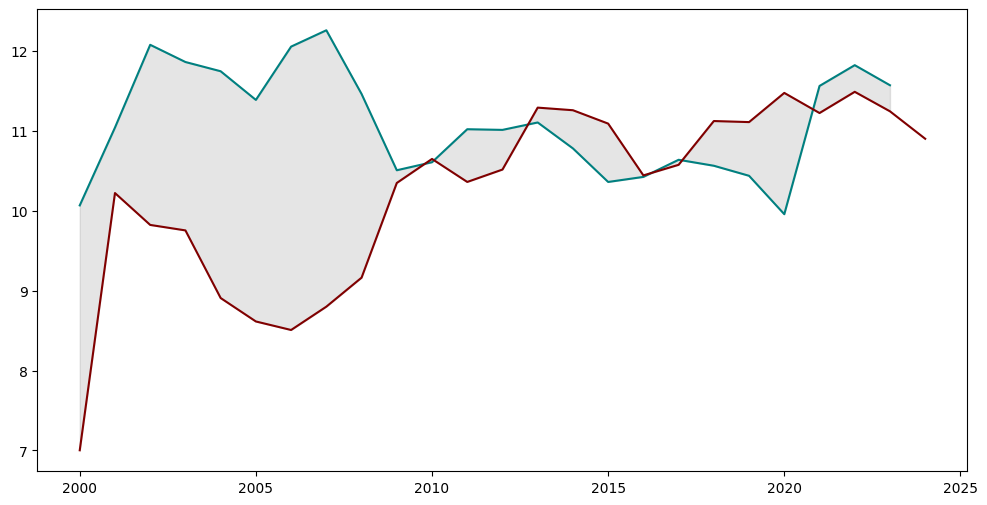

In [102]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

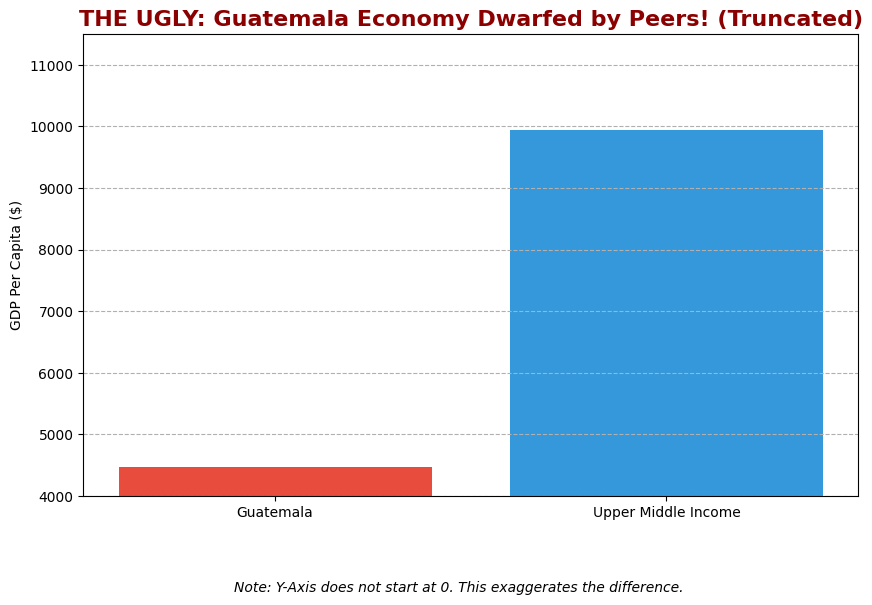

In [103]:
# THE UGLY CHART
# Setup snapshot data for the latest available year
snapshot_year = 2023
gtm_val = df.loc[snapshot_year, ('GTM', 'GDP_Per_Capita_Const')]
umc_val = df.loc[snapshot_year, ('UMC', 'GDP_Per_Capita_Const')]

values = [gtm_val, umc_val]
labels = ['Guatemala', 'Upper Middle Income']

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, values, color=['#e74c3c', '#3498db'])

# THE VIOLATION: Truncating the axis
# Guatemala is approx 4600. UMC is approx 11000.
# Starting axis at 4000 makes GTM look tiny.
plt.ylim(4000, 11500)

plt.title('THE UGLY: Guatemala Economy Dwarfed by Peers! (Truncated)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('GDP Per Capita ($)')
plt.grid(axis='y', linestyle='--')
plt.figtext(0.5, -0.05, "Note: Y-Axis does not start at 0. This exaggerates the difference.", ha="center", style='italic')

plt.show()

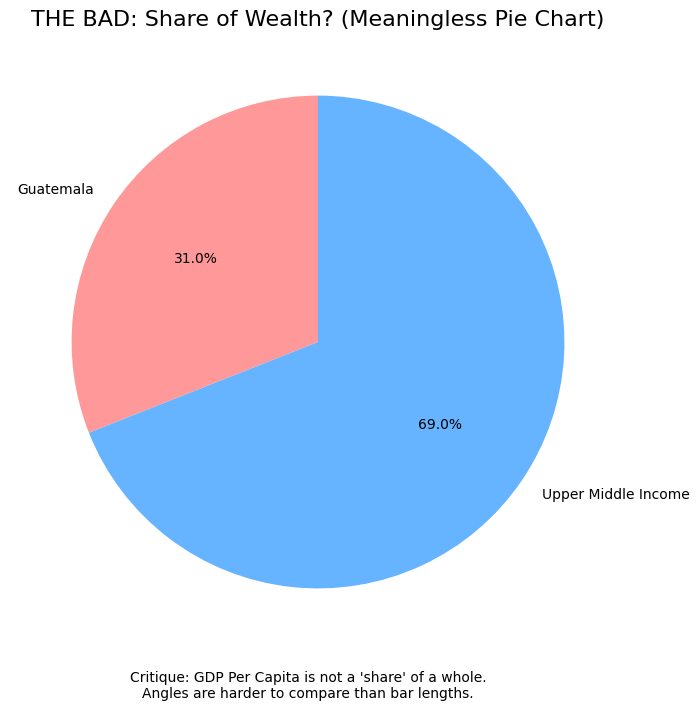

In [104]:
# CELL 9: THE BAD CHART
plt.figure(figsize=(8, 8))

# THE VIOLATION: Using a Pie Chart for non-summable data (GDP Per Capita)
# Comparison of magnitudes should be a Bar Chart, not angles.
plt.pie(values, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=90)

plt.title('THE BAD: Share of Wealth? (Meaningless Pie Chart)', fontsize=16)
plt.figtext(0.5, 0.05, "Critique: GDP Per Capita is not a 'share' of a whole.\nAngles are harder to compare than bar lengths.", ha="center")

plt.show()

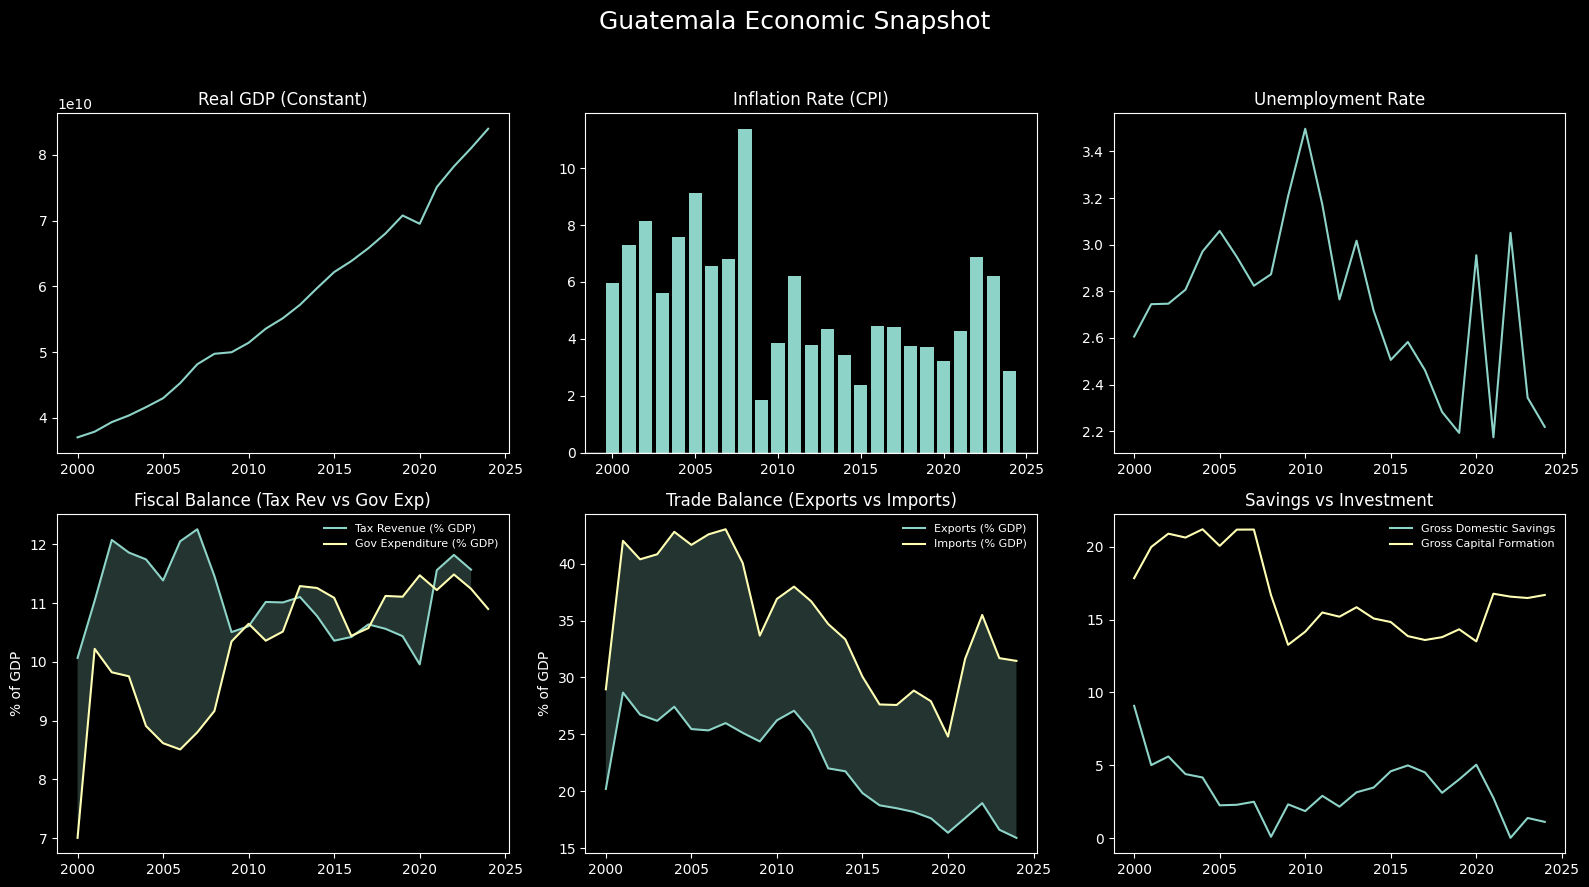

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Prep x-axis (works whether you have a Year column or a datetime index) ---
df = df_gtm.copy()

if "Year" in df.columns:
    x = df["Year"]
else:
    # assume index is year/datetime-like
    df = df.sort_index()
    x = df.index

# Optional: keep only the columns we need (and align NaNs consistently)
cols = [
    "GDP_Const", "Inflation_CPI", "Unemployment_Rate",
    "Tax_Rev_GDP", "Gov_Exp_GDP",
    "Exports_GDP", "Imports_GDP",
    "Gross_Dom_Savings", "Gross_Cap_Formation"
]
df = df[cols].copy()

# --- Style ---
plt.style.use("dark_background")

fig, axes = plt.subplots(2, 3, figsize=(16, 9))
fig.suptitle("Guatemala Economic Snapshot", fontsize=18, y=0.98)

# 1) Top Left: Real GDP (Line)
ax = axes[0, 0]
ax.plot(x, df["GDP_Const"])
ax.set_title("Real GDP (Constant)")
ax.set_xlabel("")
ax.set_ylabel("")

# 2) Top Middle: Inflation (Bar) + 0 line
ax = axes[0, 1]
ax.bar(x, df["Inflation_CPI"])
ax.axhline(0, linewidth=1)
ax.set_title("Inflation Rate (CPI)")
ax.set_xlabel("")
ax.set_ylabel("")

# 3) Top Right: Unemployment (Line)
ax = axes[0, 2]
ax.plot(x, df["Unemployment_Rate"])
ax.set_title("Unemployment Rate")
ax.set_xlabel("")
ax.set_ylabel("")

# 4) Bottom Left: Fiscal Balance (fill between Tax Rev and Gov Exp)
ax = axes[1, 0]
tax = df["Tax_Rev_GDP"]
gov = df["Gov_Exp_GDP"]
ax.plot(x, tax, label="Tax Revenue (% GDP)")
ax.plot(x, gov, label="Gov Expenditure (% GDP)")
ax.fill_between(x, tax, gov, alpha=0.25)
ax.set_title("Fiscal Balance (Tax Rev vs Gov Exp)")
ax.legend(fontsize=8, frameon=False)
ax.set_xlabel("")
ax.set_ylabel("% of GDP")

# 5) Bottom Middle: Trade Balance (fill between Exports and Imports)
ax = axes[1, 1]
exp = df["Exports_GDP"]
imp = df["Imports_GDP"]
ax.plot(x, exp, label="Exports (% GDP)")
ax.plot(x, imp, label="Imports (% GDP)")
ax.fill_between(x, exp, imp, alpha=0.25)
ax.set_title("Trade Balance (Exports vs Imports)")
ax.legend(fontsize=8, frameon=False)
ax.set_xlabel("")
ax.set_ylabel("% of GDP")

# 6) Bottom Right: Savings vs Investment (dual lines)
ax = axes[1, 2]
sav = df["Gross_Dom_Savings"]
inv = df["Gross_Cap_Formation"]
ax.plot(x, sav, label="Gross Domestic Savings")
ax.plot(x, inv, label="Gross Capital Formation")
ax.set_title("Savings vs Investment")
ax.legend(fontsize=8, frameon=False)
ax.set_xlabel("")
ax.set_ylabel("")

# --- Layout ---
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
